In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
# Assuming you've downloaded the dataset and placed it in the same directory
# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows to understand the dataset
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [7]:
# Select the relevant features and target variable
features = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
target = data['SalePrice']

# Display the selected data
print(features.head())
print(target.head())


   GrLivArea  BedroomAbvGr  FullBath
0       1710             3         2
1       1262             3         2
2       1786             3         2
3       1717             3         1
4       2198             4         2
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict house prices on the test set
y_pred = model.predict(X_test)

# Compare the predictions with the actual values
print(y_pred[:5])
print(y_test[:5])

[113410.67255298 305081.87775899 135904.78562983 205424.67564124
 227502.68349004]
892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64


In [15]:
# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2806426667.247853
R^2 Score: 0.6341189942328371


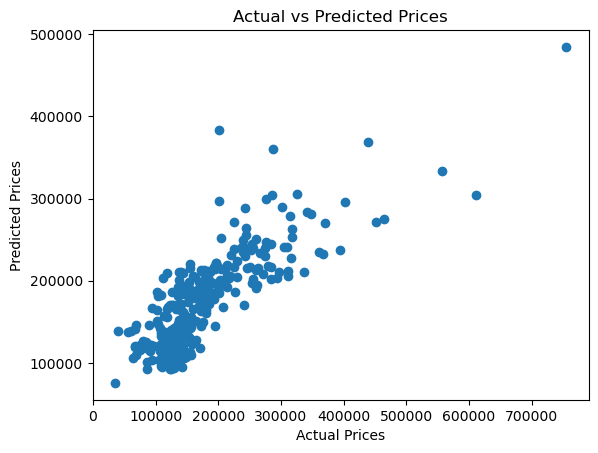

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [19]:
def predict_house_price(living_area, bedrooms, bathrooms):
    # Prepare the input as a 2D array since the model expects this shape
    input_features = np.array([[living_area, bedrooms, bathrooms]])
    
    # Predict the price using the trained model
    predicted_price = model.predict(input_features)
    
    return predicted_price[0]

In [21]:
try:
    living_area = float(input("Enter the square footage of the house: "))
    bedrooms = int(input("Enter the number of bedrooms: "))
    bathrooms = int(input("Enter the number of bathrooms: "))
    
    # Predict the house price based on user input
    predicted_price = predict_house_price(living_area, bedrooms, bathrooms)
    print(f'Predicted House Price: ${predicted_price:.2f}')
    
except ValueError:
    print("Invalid input. Please enter numerical values for square footage, number of bedrooms, and number of bathrooms.")

Enter the square footage of the house:  1500
Enter the number of bedrooms:  6
Enter the number of bathrooms:  5


Predicted House Price: $198441.84


C:\Users\Hadi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
